In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# from cf_matrix import make_confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
imagePath = "Images/afiq.jpg"

img = cv2.imread(imagePath)

In [4]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# initialize face classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [5]:
# detect face using face classifier
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)


# draw bbox
for (x, y, w, h) in face:
    crop_img = img[y:y+h,x:x+w]
    # cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(crop_img)
plt.axis('off')

In [7]:
# import model

model = tf.keras.models.load_model("saved_model")

In [8]:
labels = os.listdir("train")

In [9]:
cv_image = cv2.cvtColor(np.array(crop_img), cv2.COLOR_RGB2GRAY)
# grayscale = cv2.cvtColor(cv_image, cv.COLOR_BGR2GRAY)

# normalized = grayscale / 255
# resized = cv.resize(normalized, (60, 40), interpolation=cv.INTER_AREA)
resized = cv2.resize(cv_image, (48, 48), interpolation=cv2.INTER_AREA)

probabilities = model.predict(np.array([resized]))
key = labels[np.argmax(probabilities)]

print(key, np.max(probabilities))

1/1 [==============================] - 0s 126ms/step
happy 0.23433363


(-0.5, 3023.5, 4031.5, -0.5)

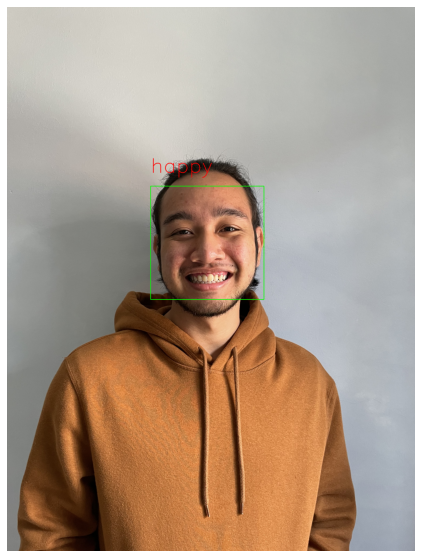

In [12]:
result_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for (x, y, w, h) in face:
    # crop_img = img[y:y+h,x:x+w]
    cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    cv2.putText(result_img,key, (x,y-100), cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 3,cv2.LINE_AA,False)

    # cv2.putText(img,'Hello World!', 
    # bottomLeftCornerOfText, 
    # font, 
    # fontScale,
    # fontColor,
    # thickness,
    # lineType)


plt.figure(figsize=(20,10))
plt.imshow(result_img)
plt.axis('off')